### 친구 역설

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

#### 한글 폰트 불러오기

In [2]:
from matplotlib import font_manager, rc

font_path = "C:/Windows/Fonts/malgun.ttf"
font = font_manager.FontProperties(fname = font_path).get_name()
rc('font', family = font)
plt.rcParams['axes.unicode_minus'] = False

#### 그래프 제작

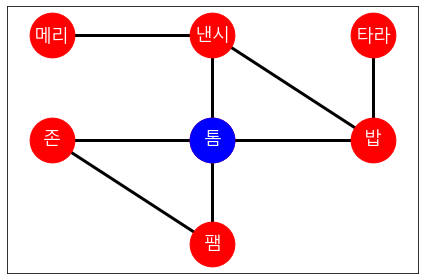

In [84]:
a = nx.Graph()

a.add_edges_from([('메리','낸시'),
                  ('낸시','톰'),('낸시','밥'),
                  ('톰','존'),('톰','팸'),('톰','밥'),
                  ('존','팸'),
                  ('밥','타라')])

fix = {"메리":[0,1],
       "낸시":[0.5,1],
       "톰":[0.5,0.5],
       "타라":[1,1],
       "존":[0,0.5],
       "팸":[0.5,0],
       "밥":[1,0.5]}

options = {"node_color":"blue", "node_size":2000}

nx.draw_networkx_nodes(a, pos = fix, node_size=2000, node_color = 'red')
nx.draw_networkx_nodes(a, pos = fix, nodelist=['톰'], **options)

nx.draw_networkx_labels(a, pos = fix, font_family = font, font_size=18, font_color = 'white')

nx.draw_networkx_edges(a, pos = fix, width = 3)


ax = plt.gca()
ax.margins(0.08)
plt.tight_layout()
plt.show()

In [21]:
import numpy as np

round(np.mean(list(nx.average_neighbor_degree(a).values())),2)

2.83

In [22]:
val = []

for i in range(len(list(nx.degree(a)))):
    val.append(list(nx.degree(a))[i][1])
round(np.mean(val),2)

2.29

### 문제 3.4

In [201]:
a_degree_max = np.max([a.degree(n) for n in a.nodes])

sample = dict(nx.degree(a))
ans = []

for key, value in sample.items():
    if value == a_degree_max :
         ans.append(key)
         
print(ans, a_degree_max)

['톰'] 4


### 문제 3.6

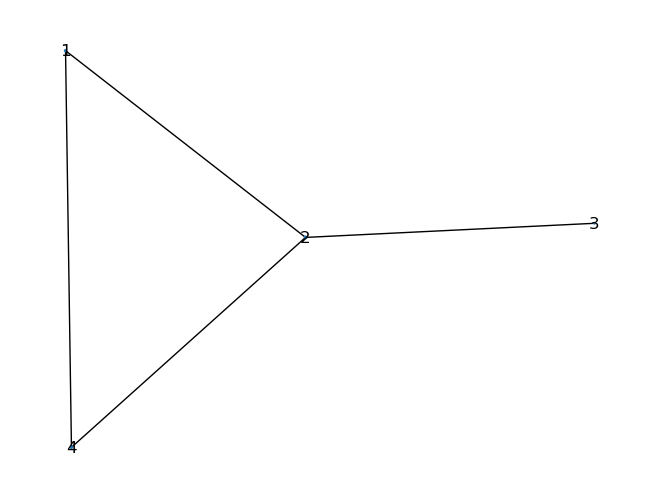

In [6]:
b = nx.Graph()

b.add_edges_from([(1,2),
                  (2,3),
                  (1,4),
                  (4,2)])
size = [b.degree(n) for n in b.nodes]

nx.draw(b, with_labels = True, node_size = size)

### 문제 3.11

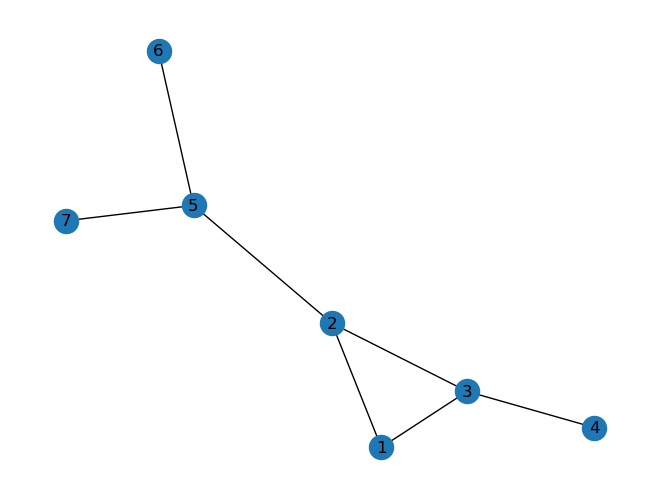

In [25]:
v = nx.Graph()

v.add_edges_from([(1,2),(1,3),
                  (2,3),(2,5),
                  (3,4),
                  (5,6),(5,7)])

nx.draw(v, with_labels = True)


In [7]:
v_degree_max = np.max([v.degree(n) for n in v.nodes])

sample = dict(nx.degree(v))
ans = []

for key, value in sample.items():
    if value == v_degree_max :
         ans.append(key)
         
print(ans, v_degree_max)

[2, 3, 5] 3


#### dict에서 max key, value를 찾는 함수 제작

In [75]:
from collections import defaultdict

def get_max_key(data):
    d = defaultdict(list)
    for key, value in data.items():
        d[value].append(key)
    return max(d.items())[1]

In [76]:
v_bc = nx.betweenness_centrality(v)
get_max_key(v_bc)

[2, 5]

In [27]:
v_cc = nx.closeness_centrality(v)
get_max_key(v_cc)

[2]

### 문제 3.17

#### 1번

In [2]:
air = nx.read_graphml('data/openflights_usa.graphml.gz')

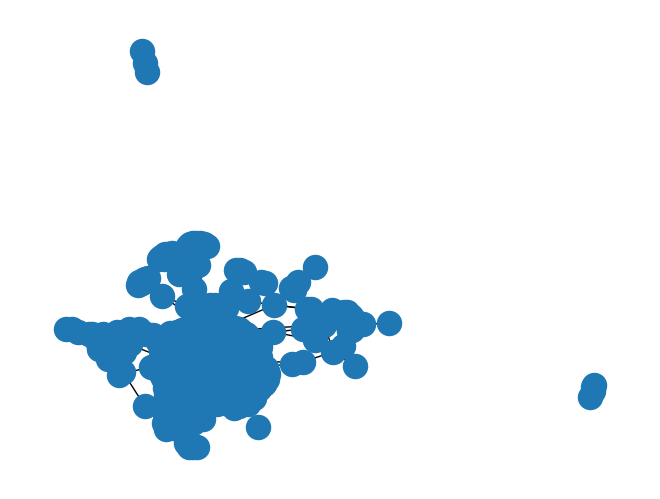

In [3]:
nx.draw(air) # node : 공항, link : 항공 노선

In [11]:
air_degree_mean = np.mean([air.degree(n) for n in air.nodes])
round(air_degree_mean,2)

10.19

#### 2번

In [51]:
air_rank = dict(air.degree())

import operator
sorted_air = sorted(air_rank.items(), key = operator.itemgetter(1), reverse=True) # 0은 key, 1은 value 기준으로 정렬
sorted_air

[('ATL', 153),
 ('ORD', 149),
 ('DEN', 148),
 ('DFW', 138),
 ('MSP', 117),
 ('DTW', 114),
 ('LAS', 113),
 ('CLT', 110),
 ('IAH', 101),
 ('PHL', 88),
 ('LAX', 85),
 ('DCA', 85),
 ('SLC', 85),
 ('IAD', 81),
 ('PHX', 77),
 ('SEA', 75),
 ('MCO', 74),
 ('EWR', 72),
 ('SFO', 71),
 ('BOS', 70),
 ('MDW', 66),
 ('LGA', 65),
 ('TPA', 63),
 ('BWI', 63),
 ('FLL', 58),
 ('JFK', 57),
 ('STL', 56),
 ('PDX', 54),
 ('CLE', 53),
 ('SAN', 50),
 ('MIA', 49),
 ('SFB', 48),
 ('HOU', 48),
 ('BNA', 46),
 ('CVG', 43),
 ('MCI', 41),
 ('AUS', 39),
 ('MSY', 38),
 ('RDU', 36),
 ('ANC', 34),
 ('OAK', 33),
 ('PIT', 33),
 ('AZA', 32),
 ('MEM', 32),
 ('IND', 32),
 ('PIE', 31),
 ('CMH', 31),
 ('RSW', 31),
 ('SAT', 30),
 ('MKE', 28),
 ('HNL', 28),
 ('SMF', 28),
 ('SJC', 27),
 ('JAX', 24),
 ('DAL', 23),
 ('BDL', 23),
 ('SDF', 23),
 ('ABQ', 23),
 ('BET', 22),
 ('OKC', 22),
 ('MYR', 21),
 ('OMA', 20),
 ('OGG', 20),
 ('BUF', 20),
 ('GRR', 20),
 ('CHS', 20),
 ('GSP', 20),
 ('ORF', 19),
 ('PVD', 19),
 ('PBI', 19),
 ('BHM', 19

#### 3번

In [64]:
def get_min_key(data):
    d = defaultdict(list)
    for key, value in data.items():
        d[value].append(key)
    return min(d.items())[1]

len(get_min_key(air_rank))

156

#### 4번

In [79]:
get_max_key(nx.closeness_centrality(air))

['DEN']

#### 5번

In [80]:
get_max_key(nx.betweenness_centrality(air))

['ANC']

#### 6번

In [99]:
air_node = air.number_of_nodes()
air_edge = air.number_of_edges()

In [102]:
k1 = nx.density(air)*(air_node-1) # 평균 연결선 수 = 조밀도 * (노드의 개수 - 1)


10.186813186813186

In [105]:
2*air_edge/air_node # => 2L/N도 동일한 결과 확인

10.186813186813186

In [109]:
val = []

for i in range(len(list(air.degree()))):
    val.append(list(air.degree())[i][1])
    
def sqr(list):
    return [i * i for i in list]

k2 = sum(sqr(val))/air_node # 평균 제곱 연결선 수
print(k2)

554.9157509157509


In [112]:
k = k2/(k1**2) # 불균일도 = 평균 제곱 연결선 수 / 평균 연결선 수의 제곱
round(k,2)

5.35